In [3]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

import tqdm


dataset = datasets.MNIST('../data', train=True, download=True)
data = dataset.data
labels = dataset.targets
#convert labels to one-hot
one_hot_labels = torch.zeros(len(labels), 10)
one_hot_labels[torch.arange(len(labels)), labels] = 1

print(data.shape)
print(one_hot_labels.shape)

np.save("./datasets/mnist_orig.npy", data.numpy())
np.save("./datasets/mnist_orig_labels.npy", one_hot_labels.numpy())

torch.Size([60000, 28, 28])
torch.Size([60000, 10])


C:\Users\Timothe\AppData\Local\Temp/ipykernel_50412/2363662977.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image1 = torch.tensor(image1).float()
C:\Users\Timothe\AppData\Local\Temp/ipykernel_50412/2363662977.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image2 = torch.tensor(image2).float()
C:\Users\Timothe\AppData\Local\Temp/ipykernel_50412/2363662977.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,3)


(100, 28, 28)
(100, 10)


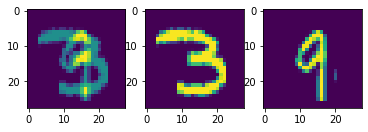

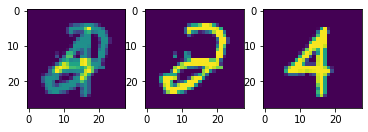

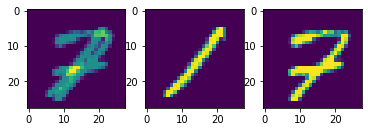

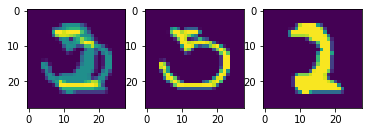

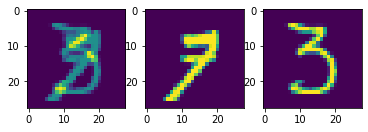

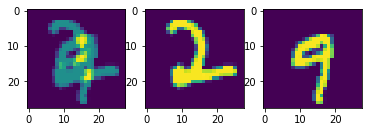

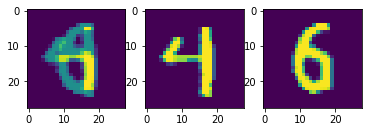

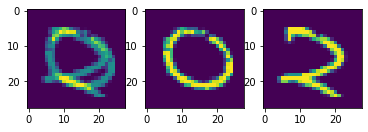

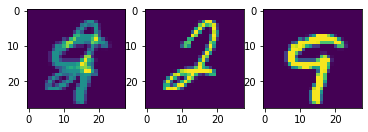

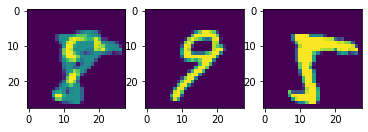

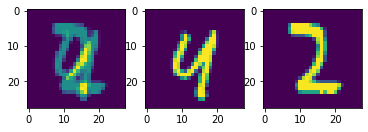

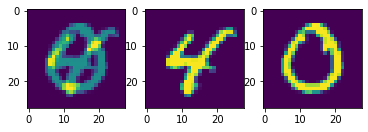

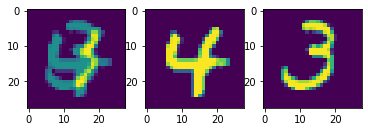

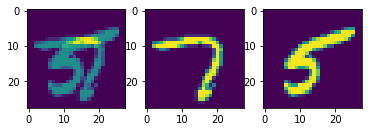

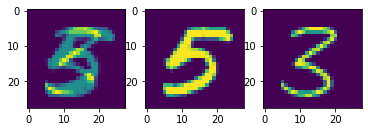

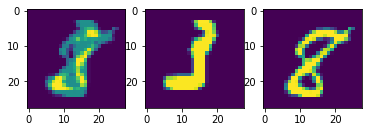

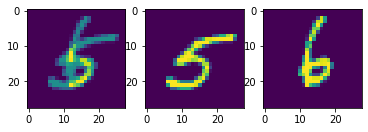

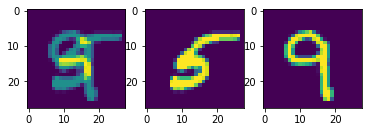

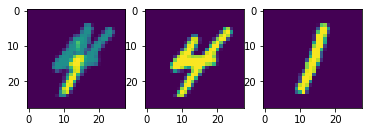

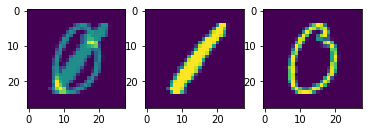

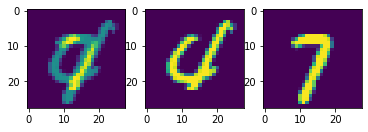

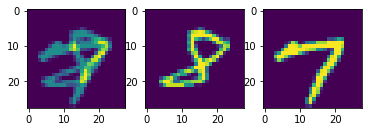

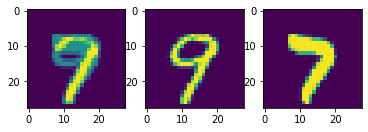

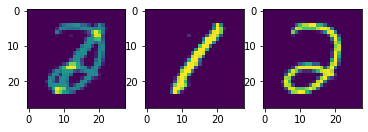

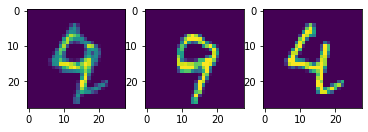

Error in callback <function flush_figures at 0x0000029E394185E0> (for post_execute):


KeyboardInterrupt: 

In [11]:
#generate new training data
generated_images = []
generated_labels = []
for i in range(0,100):
    #select 2 images at random
    idx1 = np.random.randint(0,data.shape[0])
    image1 = data[idx1]
    image1 = torch.tensor(image1).float()
    label1 = one_hot_labels[idx1]
    idx2 = np.random.randint(0,data.shape[0])
    image2 = data[idx2]
    image2 = torch.tensor(image2).float()
    label2 = one_hot_labels[idx2]

    #interpolate between the two images
    image = torch.lerp(image1, image2, 0.5)

    #interpolate between the two labels
    label = torch.lerp(label1, label2, 0.5)

    fig, ax = plt.subplots(1,3)
    ax[0].imshow(image.cpu().numpy().squeeze())
    ax[1].imshow(image1.cpu().numpy().squeeze())
    ax[2].imshow(image2.cpu().numpy().squeeze())
    # print(label)

    #add to the list
    generated_images.append(image.numpy())
    generated_labels.append(label.numpy())

generated_images = np.array(generated_images)
generated_labels = np.array(generated_labels)
print(generated_images.shape)
print(generated_labels.shape)
#save the generated images and labels
np.save("./datasets/mixup.npy", generated_images)
np.save("./datasets/mixup_labels.npy", generated_labels)